In [25]:
# Data Manipulation
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import seaborn as sns
import matplotlib.dates as mdates
from sklearn.preprocessing import StandardScaler

# Machine Learning / Time Series
from scipy import stats
import statsmodels.api as sm
from factor_analyzer import FactorAnalyzer

# Snowflake & ETC
import datetime
import copy

In [26]:
df = pd.read_csv("dog_data_clean.csv", index_col= [0])
df = df.reset_index(drop=True)
df.head(2)

,dog,height,weight,life,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,...,Mental Stimulation Needs,popularity_rank,color,marking,health,grooming,excercise,training,nutrition,temp
0,affenpinscher,10.25,8.5,13.5,3,3,3,3,3,1,...,3,159.0,"['Belge', 'Black', 'Black & Silver', 'Black & ...",['Black Mask'],Owning a dog is not just a privilege; it’s a r...,"Affenpinschers are generally healthy dogs, and...","The Affenpinscher's medium-length, wiry coat s...",One of the attractions of the toy breeds is th...,"Affenpinschers are courageous, bold, and often...",2
1,afghan-hound,26.00,55.0,15.0,3,3,3,1,4,1,...,3,114.0,"['Black', 'Black & Silver', 'Black & Tan', 'Bl...","['Black Mask', 'Brindle', 'Brindle Black Mask'...",Owning a dog is not just a privilege; it’s a r...,Sighthounds such as Afghans have naturally low...,"Afghan puppies have short, fuzzy coats (includ...","Because Afghans are sighthounds, bred to hunt ...","Afghans are independent, dignified, and aloof ...",2


In [27]:
df = df.drop('temp', axis = 1)

In [28]:
def remove_dup_set(input_list):
    result = []
    for ele in input_list:
        if ele not in result:
            result.append(ele)
    return result

In [29]:
corr_df = df.corr()

strong_neg_list = []
weak_neg_list = []
strong_pos_list = []
weak_pos_list = []

for col in corr_df.columns:
    strong_neg = np.where(corr_df[col] < -0.7)
    weak_neg = np.where((corr_df[col] >= -0.7) & (corr_df[col] < -0.4))
    strong_pos = np.where((corr_df[col] > 0.7) & (corr_df[col] != 1))
    weak_pos = np.where((corr_df[col] <= 0.7) & (corr_df[col] > 0.4))

    strong_neg_list_temp = list(corr_df.index[strong_neg])
    weak_neg_list_temp = list(corr_df.index[weak_neg])
    strong_pos_list_temp = list(corr_df.index[strong_pos])
    weak_pos_list_temp = list(corr_df.index[weak_pos])

    strong_neg_list_temp = [{ele,col} for ele in strong_neg_list_temp]
    weak_neg_list_temp = [ {ele,col} for ele in weak_neg_list_temp]
    strong_pos_list_temp = [{ele,col} for ele in strong_pos_list_temp]
    weak_pos_list_temp = [{ele,col} for ele in weak_pos_list_temp]

    strong_neg_list = strong_neg_list + strong_neg_list_temp
    weak_neg_list = weak_neg_list + weak_neg_list_temp
    strong_pos_list = strong_pos_list + strong_pos_list_temp
    weak_pos_list = weak_pos_list + weak_pos_list_temp

strong_neg_list  = remove_dup_set(strong_neg_list)
weak_neg_list = remove_dup_set(weak_neg_list)
strong_pos_list = remove_dup_set(strong_pos_list)
weak_pos_list = remove_dup_set(weak_pos_list)

<AxesSubplot:>

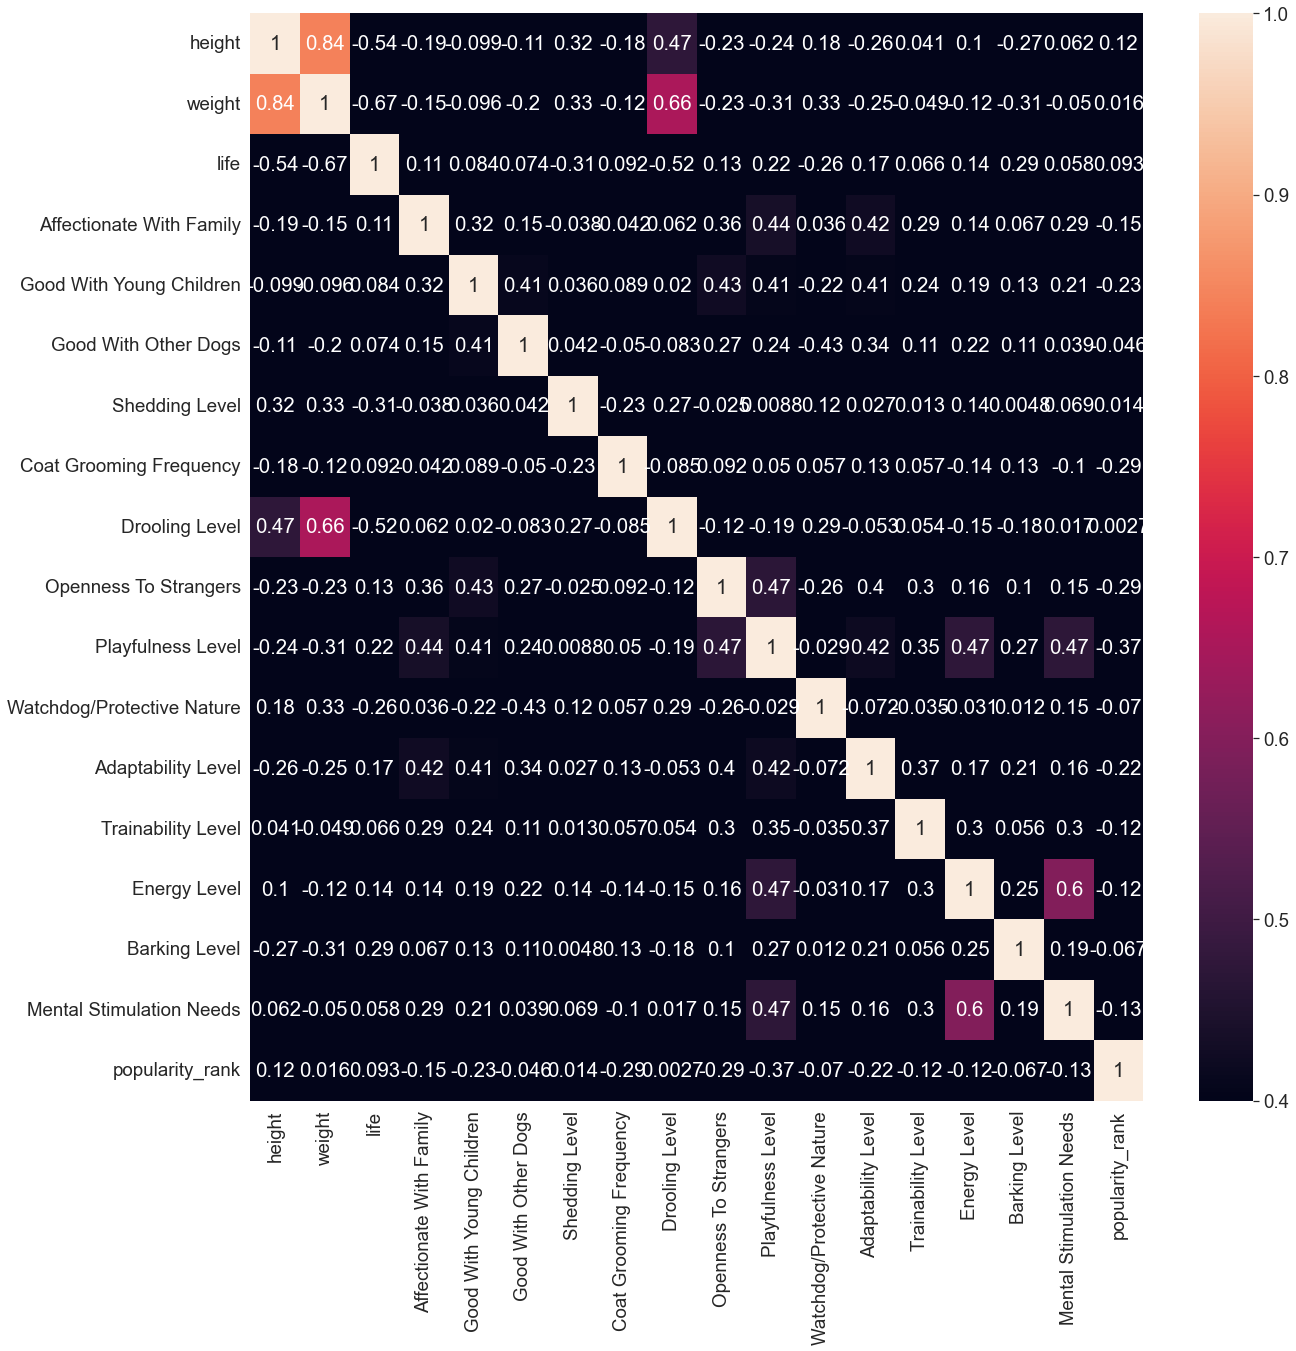

In [30]:
# Let's focus on the one that are hightly correlated

# what can we observe from here
sns.set(font_scale=1.7)
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(df.corr(), ax=ax, annot = True, vmin = 0.4, vmax = 1)

high 0.7 ~
moderate 0.4 ~ 0.7
weak ~0.4

There are high correlation between weight and height
moderate correlation between
- weight & Doorling
- height & Drooling
- open to stranger & playfulness
- energy level & playfulness
- mental stimulation needs & playfullness
- mental stimulation needs & energy level

# Let's focus on the one that are hightly correlated

# what can we observe from here


<AxesSubplot:>

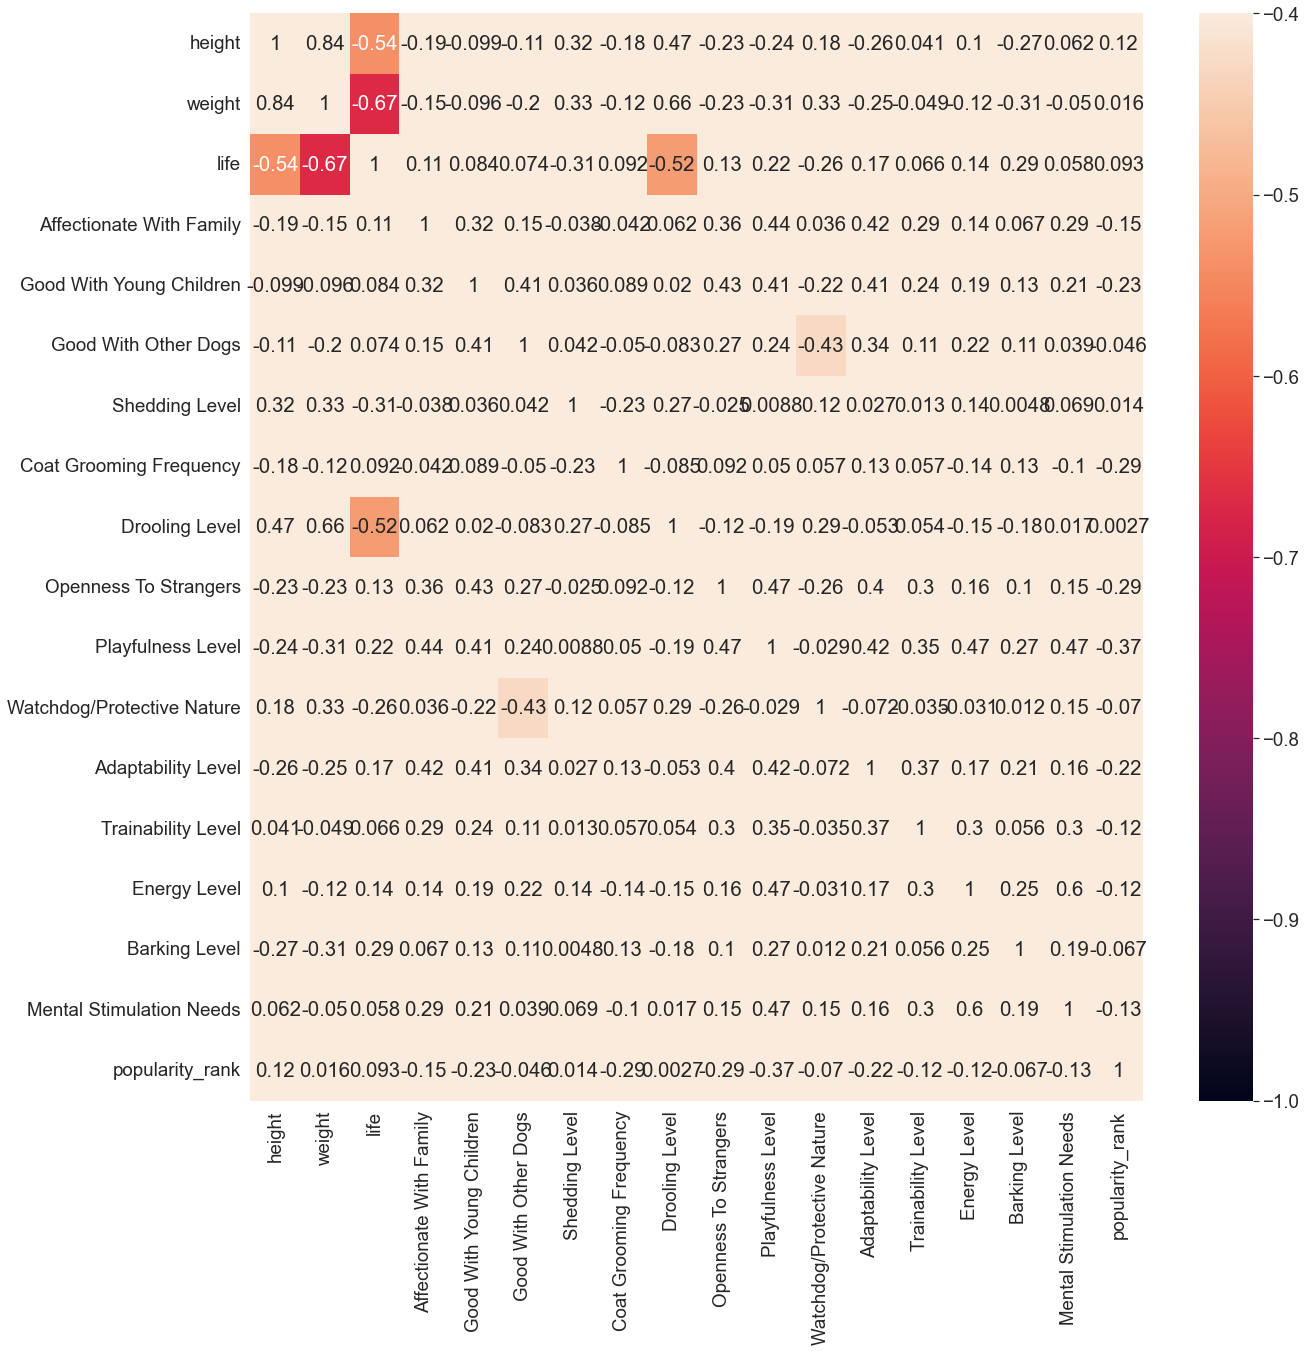

In [31]:
# what can we observe from here
sns.set(font_scale=1.7)
fig, ax = plt.subplots(figsize=(20,20))  
sns.heatmap(df.corr(), ax=ax, annot = True, vmin = -1, vmax = -0.4)

In [32]:
df_factor = df.drop(['dog','color','marking','health','grooming','excercise','training','nutrition','Coat Type','Coat Length'],axis = 1)

In [33]:
df_factor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   height                      262 non-null    float64
 1   weight                      262 non-null    float64
 2   life                        262 non-null    float64
 3   Affectionate With Family    262 non-null    int64  
 4   Good With Young Children    262 non-null    int64  
 5   Good With Other Dogs        262 non-null    int64  
 6   Shedding Level              262 non-null    int64  
 7   Coat Grooming Frequency     262 non-null    int64  
 8   Drooling Level              262 non-null    int64  
 9   Openness To Strangers       262 non-null    int64  
 10  Playfulness Level           262 non-null    int64  
 11  Watchdog/Protective Nature  262 non-null    int64  
 12  Adaptability Level          262 non-null    int64  
 13  Trainability Level          262 non

In [34]:
for col in df_factor:
    df_factor[col] = (df_factor[col] - df_factor[col].mean()) / df_factor[col].std()

In [ ]:
def get_idx(df,dog_name):
    return df[df['dog']== dog_name].index.to_list()[0]

def get_names(df,dog_name):
    dist_list = []
    for i in range(df.shape[0]):
        dist_list.append(np.linalg.norm(normalized_df_euclidean.iloc[get_idx(df,dog_name)]-normalized_df_euclidean.iloc[i]))
    idx_list = sorted(range(len(dist_list)), key=lambda i: dist_list[i], reverse=False)[:6]
    return df['dog'][idx_list], 1- (sorted(dist_list)[0:6] / sorted(dist_list)[-1])

def euclidean_by_name(df, dog_name):
    name_list, dis = get_names(df,dog_name)
    for name,d in zip(name_list,dis):
        print(name)
        print(format(d,'.2%'), "simliar to", dog_name)
        display(Image(filename=f'img/{name}.jpg'))
        

In [40]:
# def similiar_dogs(df,idx):

base = df_factor.loc[0]
dist_list = []
for i in range(df_factor.shape[0]):
    dist_list.append(np.linalg.norm(base - df_factor.loc[i].values))
df_factor['dist'] = dist_list
df_factor = df_factor.sort_values(by = 'dist')
df_factor.head(5)

,height,weight,life,Affectionate With Family,Good With Young Children,Good With Other Dogs,Shedding Level,Coat Grooming Frequency,Drooling Level,Openness To Strangers,Playfulness Level,Watchdog/Protective Nature,Adaptability Level,Trainability Level,Energy Level,Barking Level,Mental Stimulation Needs,popularity_rank,dist
0,-1.503913,-1.204339,0.491576,-1.653079,-0.807698,-0.495962,0.418945,0.870223,-0.878149,1.674324,-0.764769,-0.762156,0.380813,-0.991457,-0.888823,-0.031485,-0.905099,0.523612,0.000000
150,-1.463030,-1.026163,0.491576,0.614495,-0.807698,-0.495962,-1.993444,0.870223,-0.878149,-0.394888,-0.764769,1.317894,1.826798,-0.991457,-0.888823,-0.031485,-0.905099,-0.615305,3.816824
170,0.417567,0.755602,-0.970634,0.614495,1.151718,-0.495962,0.418945,1.916087,1.185305,-0.394888,0.589079,0.277869,0.380813,0.142874,-0.888823,-0.031485,0.442264,-0.843089,4.093888
124,-0.073024,0.070308,0.491576,0.614495,-0.807698,-0.495962,0.418945,-0.175641,0.153578,-0.394888,-0.764769,1.317894,-1.065172,0.142874,0.383700,-0.031485,0.442264,1.115849,4.112019
18,0.376684,-0.066751,0.199134,-0.519292,-0.807698,-0.495962,-1.993444,2.961951,-0.878149,-0.394888,-0.764769,-0.762156,-1.065172,0.142874,-0.888823,-0.031485,-0.905099,0.356571,4.263840


Factor Analysis

<AxesSubplot:>

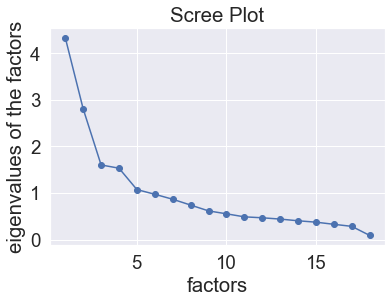

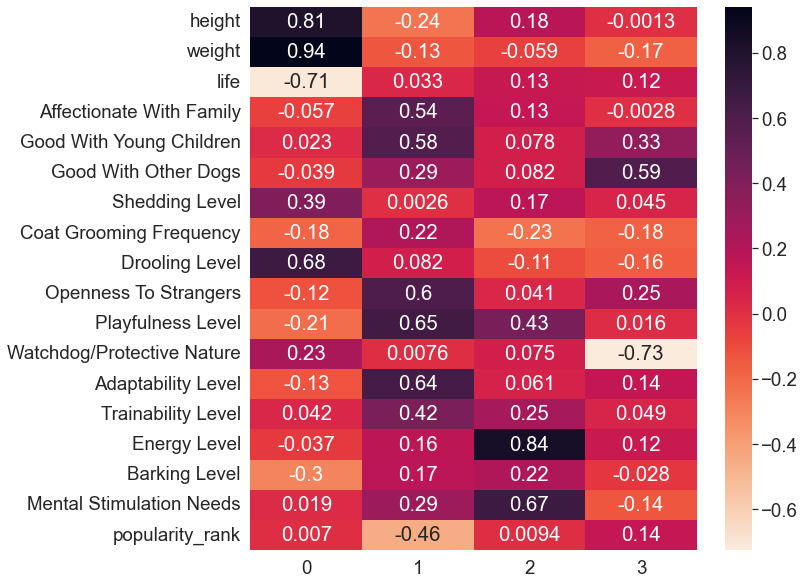

In [11]:
# Adequacy Test
# Before you perform factor analysis, you need to evaluate the “factorability” of our dataset.
# Factorability means "can we found the factors in the dataset?". There are two methods to check the factorability or sampling adequacy:
from factor_analyzer.factor_analyzer import calculate_bartlett_sphericity
chi_square_value,p_value=calculate_bartlett_sphericity(df_factor)
chi_square_value, p_value

from factor_analyzer.factor_analyzer import calculate_kmo
kmo_all,kmo_model=calculate_kmo(df_factor)
kmo_model

# Create factor analysis object and perform factor analysis
fa = FactorAnalyzer()
fa.fit(df_factor)
ev, v = fa.get_eigenvalues()

plt.scatter(np.arange(1,len(ev)+1),ev)
plt.plot(np.arange(1,len(ev)+1),ev)
plt.title('Scree Plot')
plt.xlabel('factors')
plt.ylabel('eigenvalues of the factors')

fa = FactorAnalyzer(4, rotation="varimax")
fa.fit(df_factor)
fa.loadings_
dir(fa)

fig, ax = plt.subplots(figsize=(10,10))         # Sample figsize in inches
sns.heatmap(fa.loadings_, annot = True, yticklabels= df_factor.columns, cmap="rocket_r", ax = ax)

# df_summary = pd.DataFrame(fa.get_factor_variance())
# df_summary.columns = ['Factor1','Factor2','Factor3']
# df_summary.index = ['SS Loadings', 'Proportion Var','Cumulative Var']

# df_summary

# from sklearn.preprocessing import StandardScaler
# cols = df.columns.drop(['DATE','ECOMM_SALES_AMT', 'RETAIL_SALES_AMT'])
# # Separating out the features
# x = df[cols].values
# # Standardizing the features
# x = StandardScaler().fit_transform(x)

# from sklearn.decomposition import PCA
# pca = PCA(n_components=2)
# principalComponents = pca.fit_transform(x)
# principalDf = pd.DataFrame(data = principalComponents
#              , columns = ['principal component 1', 'principal component 2'])
# ecomm_series = df[['ECOMM_SALES_AMT']].reset_index(drop=True)
# finalDf = pd.concat([principalDf, ecomm_series], axis = 1)

first Factor : height, weight, life, drooling (general ) 
second Factor : socail skill , perhaps, it indicate easy to train dog? This is a good indicator for popularity
Third Factor : How energetic the dogs are (time to commit to dog)
Last Facotr : watch dog

Let's think about the way to include hair and color into this picture

Study more recommendation system